# Análisis exploratorio

El principal objetivo del **análisis exploratorio** es conocer la naturaleza de nuestros datos. A partir de aquí surgen otra importante utilidad, la **limpieza de los datos**. En el mundo real el 99% de los datos precisan de ser procesados antes de ser utilizados.

En el Notebook Gestionando_dataframes.ipynb ya nos dimos cuenta de algunas incongruencias y tuvimos que solucionarlas, en las variables Gender, ST y Education. Eso es limpieza de datos!!

Aunque también veremos otros dos tipos de "fuentes de problemas". En ocasiones una variable, en algunas de sus observaciones, toma **valores extremos**, muy altos o muy bajos, con respecto a los demás.

También es habitual encontrar **valores perdidos**. Esto es cuando uno o varios individuos no tienen bien recogida la información y está en blanco en algunas de sus variables.

In [140]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('/content/sample_data/insurance.csv', sep = ';')

In [144]:
df[0:20]

,age,sex,bmi,children,smoker,region,charges,agree_ord,agree_nom
0,19.0,female,27.900,0,yes,southwest,16884.92400,3.0,Medio
1,18.0,male,33.770,1,no,southeast,1725.55230,3.0,Medio
2,34.0,male,33.000,3,no,southeast,4449.46200,3.0,Medio
3,33.0,male,-22.705,0,no,northwest,21984.47061,3.0,Medio
4,32.0,male,28.880,0,no,northwest,3866.85520,3.0,Medio
5,31.0,female,25.740,0,no,southeast,3756.62160,3.0,Medio
6,46.0,female,33.440,1,no,southeast,8240.58960,2.0,Un poco
7,37.0,female,27.740,3,no,northwest,7281.50560,4.0,Bastante
8,37.0,male,29.830,2,no,northeast,6406.41070,3.0,Medio
9,60.0,female,25.840,0,no,northwest,28923.13692,2.0,Un poco


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1323 non-null   float64
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1337 non-null   object 
 6   charges    1338 non-null   float64
 7   agree_ord  1329 non-null   float64
 8   agree_nom  1338 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 94.2+ KB


## Tipos de variables

Discretas y Continuas:

- Las variables **discretas** representan categorías o características: Género, estado civil, región de procedencia, marca, nivel de educación...

- Las categorías están definidas previamente, los individuos solo pueden tomar esos predeterminados valores.

- Estas variables no pueden ser usadas como medidas (sumas, medias...) pero podemos calcular cuentas

- Dentro de las categóricas distinguimos otras dos ramas: Nominales y Ordinales. 

 - Las **nominales** carecen de valor cuantitativo ni ordinal, son simples categorías que definen cualidades, de ahí que también sean conocidas como cualitativas. 
 
 - Las **ordinales** por otro lado, otorgan un orden a las categorías, siendo que su valor cualitativo indica una jerarquía, por ejemplo el orden de llegada en meta o las escalas de likert (nada de acuerdo, un poco de acuerdo...)


- Las variables **continuas** son medidas, por lo tanto, podemos calcular indicadores como la media o la mediana, sin embargo no tiene sentido hacer cuentas ya que a priori cada individuo va a tomar un valor diferente, entonces dicha cuenta sería 1 en todos los casos.

- Algunas variables continuas poseen el valor cero absoluto, es decir el cero tiene la misma "importancia" que cualquier otro valor, por ejemplo cuando medimos temperaturas. Un ejemplo de variable sin cero absoluto es una medida expresada en centímetros, si es igual a cero es como si tal distancia no existiese.

- Es habitual **categorizar** las variables continuas para hacerlas discretas. Esto nos permite jugar con las ventajas de las variables categóricas, como hacer cuentas



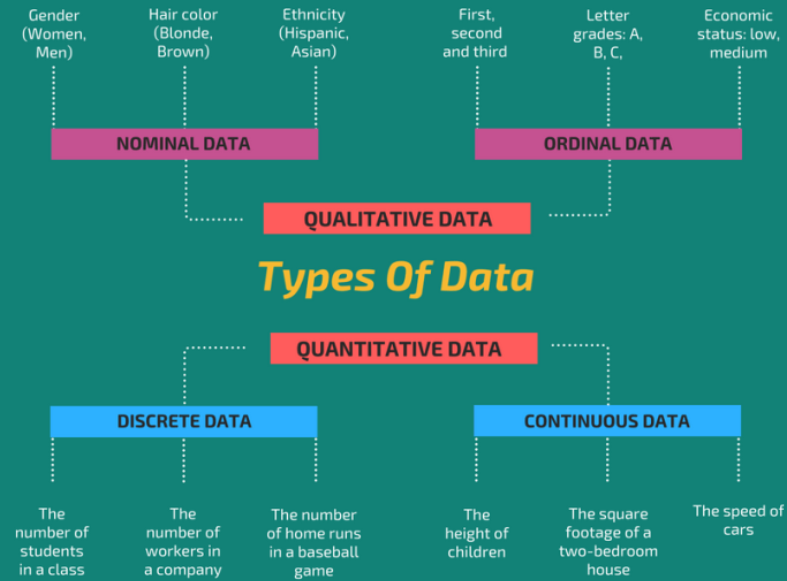

## Medidas de tendencia central y de dispersión

 - Media, suma de los valores dividido entre el número de elementos
 - Mediana, ordenamos los valores ascendentemente y nos quedamos con el valor de en medio
 - Moda, el valor más repetido
 
 
 - Varianza, sumamos la distancia de cada elemento a la media (al cuadrado, para asegurarnos de que es positiva) y dividimos por el número de elementos
 - Desviación típica, raíz cuadrada de la varianza
 
 
 - Ventajas y desventajas de la Media y la Mediana:
   - La media estamos mucho más habituados a ella y es más fácil de entender y calcular
   - La media se ve muy afectada por los valores extremos
   - La media solo debe ser usada cuando la distribución de los datos sigue una distribución normal
   - La mediana es más robusta a valores extremos y no precisa de condiciones como seguir una distribución normal


In [152]:
df.describe(percentiles = (0.1, 0.25, 0.75, 0.8, 0.9))

,age,bmi,children,charges,agree_ord
count,1323.000000,1338.000000,1338.000000,1338.000000,1329.000000
mean,39.210128,30.629458,1.100149,13270.422265,2.278405
std,14.050201,6.266549,1.228732,12110.011237,1.071604
min,18.000000,-22.705000,0.000000,1121.873900,1.000000
10%,19.000000,22.990000,0.000000,2346.533615,1.000000
25%,26.500000,26.296250,0.000000,4740.287150,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,3.000000
80%,54.000000,35.860000,2.000000,20260.626406,3.000000
90%,59.000000,38.619500,3.000000,34831.719700,4.000000


## Distribucion variables

Algunos de los métodos más habituales para reconocer cómo están distribuidas nuestras variables:

**Histogramas** - Representa conteos de variables. Si son continuas es preciso categorizarlas. 

**Gráfico de barras** - Enfrenta dos variables, es habitual poner en el eje X (horizontal) una variable temporal y en el eje Y (vertical) el valor que toma cada observación en ese instante de tiempo. Otra tipo de representaciones a través del barplot es con categorías en el eje X y en el eje Y una media o sumarización de una variable continua, por ejemplo la edad media por región.

**Boxplot** - Muy útil para entender cómo es la distribución de una variable y para encontrar valores extremos. Principalmente se representan los 3 cuartiles y los percentiles 5 y 95.

**Gráfico de dispersión** - Enfrenta dos variables, normalmente continuas. Una variable por cada eje. Muy útil para encontrar correlaciones entre variables, cuando una crece la otra decrece, o viceversa.

## histograma

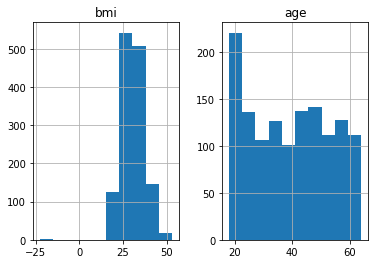

In [146]:
# bins indica el numero de categorias que hacemos para calcular la frecuencia
df.hist(column = ['bmi','age'], bins = 10);

## Gráfico de barras 

- Enfrenta dos variables, es habitual poner en el eje X (horizontal) una variable temporal y en el eje Y (vertical) el valor que toma cada observación en ese instante de tiempo. Otra tipo de representaciones a través del barplot es con categorías en el eje X y en el eje Y una media o sumarización de una variable continua, por ejemplo la edad media por región.


                age               bmi         
               mean median       mean   median
children                                      
0         38.393298   36.0  30.471185  30.3025
1         39.537736   40.0  30.623148  30.0150
2         39.435146   40.0  30.978104  31.6400
3         41.703226   42.0  30.727308  30.6375
4         39.000000   39.0  31.391200  29.6400
5         35.611111   39.0  29.605000  28.5500
10        28.000000   28.0  23.980000  23.9800 



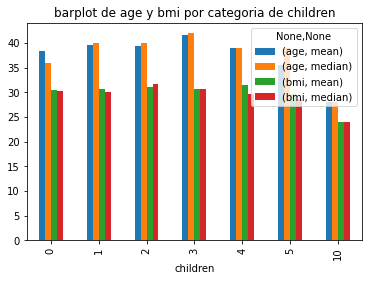

In [150]:
df_group = df.groupby('children')[['age','bmi']].agg(['mean','median'])
print(df_group, "\n") # "\n" hace un salto de línea en el print, entre la tabla y el gráfico
df_group.plot.bar(title = 'barplot de age y bmi por categoria de children');

## Boxplot
- Muy útil para entender cómo es la distribución de una variable y para encontrar **valores extremos**. Principalmente se representan los 3 cuartiles y los percentiles 5 y 95.

In [155]:
df.describe(percentiles = (0.05, 0.25, 0.75, 0.8, 0.95))

,age,bmi,children,charges,agree_ord
count,1323.000000,1338.000000,1338.000000,1338.000000,1329.000000
mean,39.210128,30.629458,1.100149,13270.422265,2.278405
std,14.050201,6.266549,1.228732,12110.011237,1.071604
min,18.000000,-22.705000,0.000000,1121.873900,1.000000
5%,18.000000,21.115500,0.000000,1757.753400,1.000000
25%,26.500000,26.296250,0.000000,4740.287150,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,3.000000
80%,54.000000,35.860000,2.000000,20260.626406,3.000000
95%,61.000000,41.106000,3.000000,41181.827787,4.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


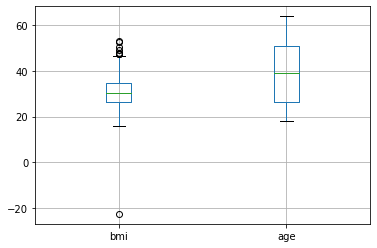

In [158]:
df.boxplot(['bmi','age']) # ,'charges'

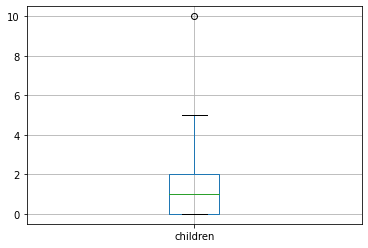

In [156]:
df.boxplot(['children'])

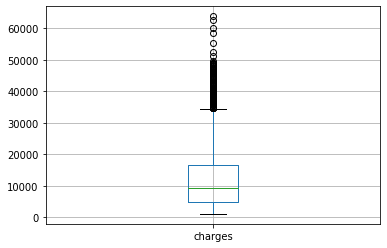

In [159]:
df.boxplot(['charges']) # ,'charges'

## Gráfico de dispersión
- Enfrenta dos variables, normalmente continuas. Una variable por cada eje. Muy útil para encontrar correlaciones entre variables, cuando una crece la otra decrece, o viceversa.

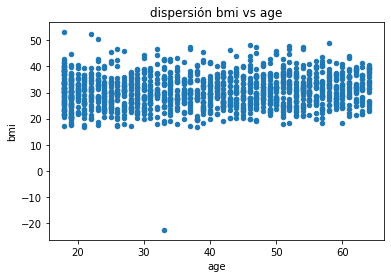

In [149]:
# Aparentemente a mayor edad (o menor) no aumenta ni disminuye el bmi
df.plot.scatter('age','bmi', title = 'dispersión bmi vs age')

Existe relación entre la variable charges y bmi?

👇 Un mayor nivel de bmi implica mayor valor de charges?

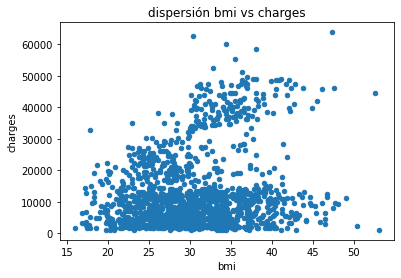

In [167]:
df.plot.scatter('bmi','charges', title = 'dispersión bmi vs charges')

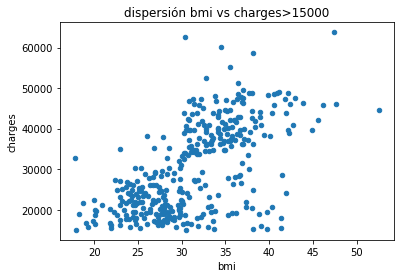

In [168]:
# Mismo gráfico que arriba pero filtrando por charges>15000, así vemos mejor la relación entre las dos variables
df[df['charges']>15000].plot.scatter('bmi','charges', title = 'dispersión bmi vs charges>15000')

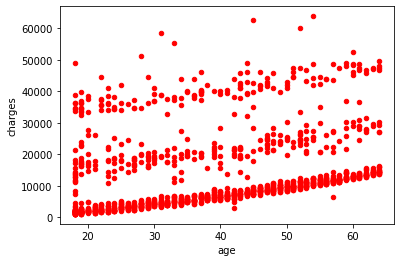

In [161]:
df.plot.scatter('age','charges', c = 'red')

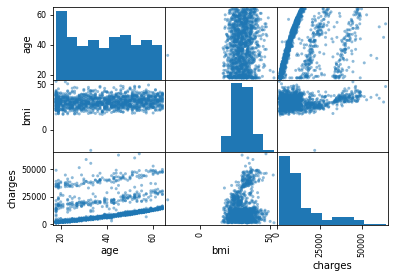

In [164]:
scatter_matrix(df[['age','bmi','charges']]);


## Limpieza de datos

En primer vamos a corregir los **valores extremos** que hemos encontrado gracias al gráfico de cajas.

Se puede hacer de dos maneras: eliminando la línea, con las consecuencias que ello conlleva o sustituir el valor por otro que esté relacionado con sus homólogos.

### Valores extremos

In [93]:
df.groupby('smoker')['bmi'].agg('median')

smoker
no     30.3525
yes    30.4475
Name: bmi, dtype: float64

In [166]:
# No hay diferencias en los niveles de bmi por smoker, entonces cambiamos los valores extremos de bmi por 30, independientemente del sexo
df.loc[df['bmi'] < 0, 'bmi'] = 30

En la variable **children** tenemos un individuo con 10 hijos. A priori no es imposible que alguien tenga 10 hijos, no obstante viendo la distribución de la variable sí vamos a considerarlo extremo y como tal vamos a corregirlo.

Al no ser un error en sí mismo vamos simplemente a sustituirlo por el valor en el **percentil 95**, para retener la información de que tiene muchos hijos pero sin que distorsione la distibución

In [169]:
df.loc[df['children'] == 10, 'children'] = 5

### Valores perdidos

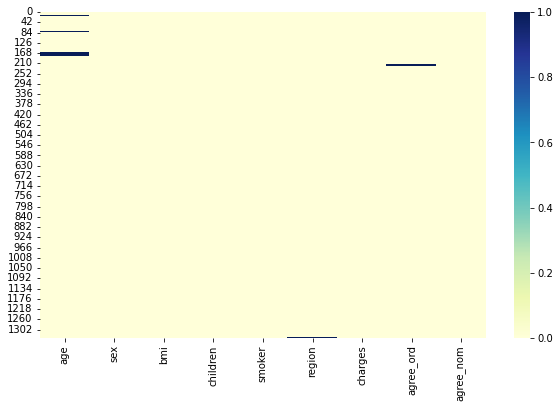

In [121]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="YlGnBu")

#### Método fillna

rellena los NaN con el valor que le indiques

.fillna(valor)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [171]:
df['agef'] = df['age'].fillna(method = 'ffill')
df['ageb'] = df['age'].fillna(method = 'bfill')

df[75:84]


,age,sex,bmi,children,smoker,region,charges,agree_ord,agree_nom,agef,ageb
75,57.0,male,34.010,0,no,northwest,11356.66090,3.0,Medio,57.0,57.0
76,29.0,female,29.590,1,no,southeast,3947.41310,1.0,Nada,29.0,29.0
77,21.0,male,35.530,0,no,southeast,1532.46970,2.0,Un poco,21.0,21.0
78,NaN,female,39.805,0,no,northeast,2755.02095,2.0,Un poco,21.0,57.0
79,57.0,female,32.965,0,no,northwest,6571.02435,3.0,Medio,57.0,57.0
80,NaN,male,26.885,1,no,northeast,4441.21315,2.0,Un poco,57.0,22.0
81,NaN,female,38.285,0,no,northeast,7935.29115,1.0,Nada,57.0,22.0
82,22.0,male,37.620,1,yes,southeast,37165.16380,5.0,Mucho,22.0,22.0
83,48.0,female,41.230,4,no,northwest,11033.66170,4.0,Bastante,48.0,48.0


Otras maneras son calcular la media por alguna de las variables y rellenar por ese valor medio.

In [49]:
df.groupby('sex')['age'].agg('mean')

sex
female    39.503021
male      38.933333
Name: age, dtype: float64

In [172]:
df.loc[df['sex'] == 'female', 'age_m'] = df['age'].fillna(39)
df.loc[df['sex'] == 'male', 'age_m'] = df['age'].fillna(38)
df[8:24]

,age,sex,bmi,children,smoker,region,charges,agree_ord,agree_nom,agef,ageb,age_m
8,37.0,male,29.830,2,no,northeast,6406.41070,3.0,Medio,37.0,37.0,37.0
9,60.0,female,25.840,0,no,northwest,28923.13692,2.0,Un poco,60.0,60.0,60.0
10,25.0,male,26.220,0,no,northeast,2721.32080,2.0,Un poco,25.0,25.0,25.0
11,62.0,female,26.290,0,yes,southeast,27808.72510,2.0,Un poco,62.0,62.0,62.0
12,23.0,male,34.400,0,no,southwest,1826.84300,4.0,Bastante,23.0,23.0,23.0
13,56.0,female,39.820,0,no,southeast,11090.71780,1.0,Nada,56.0,56.0,56.0
14,NaN,male,42.130,0,yes,southeast,39611.75770,2.0,Un poco,56.0,56.0,38.0
15,NaN,male,24.600,1,no,southwest,1837.23700,3.0,Medio,56.0,56.0,38.0
16,NaN,female,30.780,1,no,northeast,10797.33620,1.0,Nada,56.0,56.0,39.0
17,NaN,male,23.845,0,no,northeast,2395.17155,2.0,Un poco,56.0,56.0,38.0


Para el valor perdido de la variable Region no podemos estimar de ninguna manera su valor real. Así que la eliminamos


In [ ]:
df.dropna(inplace = True)

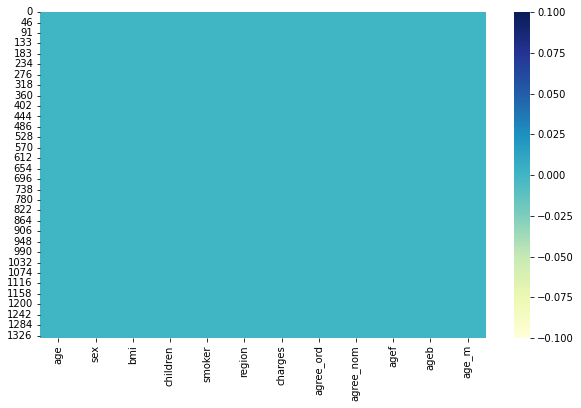

In [178]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),
            cmap="YlGnBu")

## Variables temporales

In [49]:
df_temp = pd.read_csv('/content/sample_data/Bicimad.txt', sep = ';')
df_temp.head(5)

,desigcomercial,numbicicletas,numbicicletas__1,numdocasvacias,position,entity_ts,coordinates,lon,lat,coordinates.1
0,218 - Cais do Sodré,0,0,22,"{'coordinates': [-9.14471, 38.70617], 'type': ...",01/01/2020 0:24,"-9.14471, 38.70617]","-9.14471,",38.70617],"38.70617],-9.14471,"
1,218 - Cais do Sodré,0,0,22,"{'coordinates': [-9.14471, 38.70617], 'type': ...",01/01/2020 1:04,"-9.14471, 38.70617]","-9.14471,",38.70617],"38.70617],-9.14471,"
2,218 - Cais do Sodré,0,0,22,"{'coordinates': [-9.14471, 38.70617], 'type': ...",01/01/2020 1:44,"-9.14471, 38.70617]","-9.14471,",38.70617],"38.70617],-9.14471,"
3,218 - Cais do Sodré,0,0,22,"{'coordinates': [-9.14471, 38.70617], 'type': ...",01/01/2020 2:24,"-9.14471, 38.70617]","-9.14471,",38.70617],"38.70617],-9.14471,"
4,218 - Cais do Sodré,0,0,22,"{'coordinates': [-9.14471, 38.70617], 'type': ...",01/01/2020 6:04,"-9.14471, 38.70617]","-9.14471,",38.70617],"38.70617],-9.14471,"


In [51]:
df_temp.shape

(1166, 10)

Presta atención a las funciones para extraer el hora y el mes. También las hay para día, año...

In [55]:
df_temp['dia_hora'] = pd.to_datetime(df_temp['entity_ts'])
df_temp = df_temp[df_temp['dia_hora'].dt.month == 1]
df_temp['hora'] = df_temp['dia_hora'].dt.hour
df_temp.shape

(284, 12)

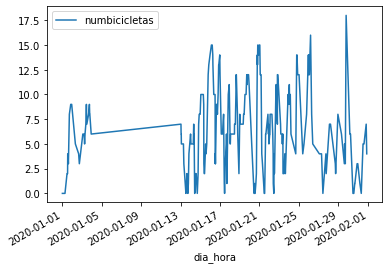

In [54]:
df_temp.plot.line('dia_hora','numbicicletas')

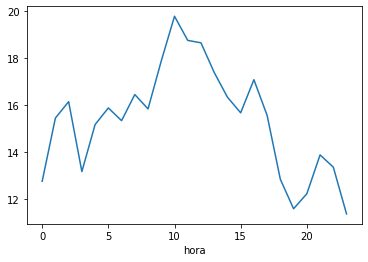

In [59]:
df_temp.groupby('hora')['numdocasvacias'].agg('mean').plot.line()

Text(0, 0.5, 'numero vacias')

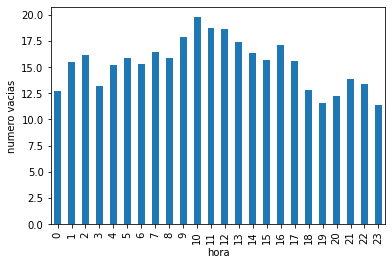

In [70]:
ax = df_temp.groupby('hora')['numdocasvacias'].agg('mean').plot.bar()
ax.set_xlabel('hora')
ax.set_ylabel('numero vacias')

## Pivot Table

In [76]:
df_pt = pd.pivot_table(df, values = 'bmi', index = 'children', columns = 'smoker', aggfunc = 'mean') # ['mean', 'median']
df_pt

smoker,no,yes
children,,
0.0,30.551950,30.543696
1.0,30.564886,30.874344
2.0,30.881162,31.304182
3.0,30.738432,30.520641
4.0,31.675455,29.306667
5.0,30.270000,18.300000


Text(0, 0.5, 'mean bmi')

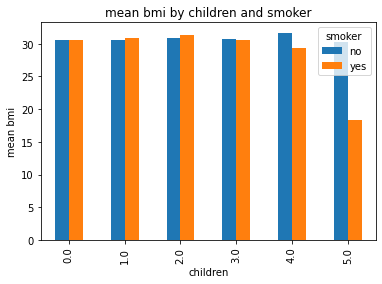

In [81]:
ax = df_pt.plot.bar(title = 'mean bmi by children and smoker')
ax.set_ylabel('mean bmi')